# **BDTs at work: the $\Omega$ analysis**

The goal of this tutorial is to provide an example of binary classification with machine learning techniques applied to an ALICE analysis. This tutorial is based on the measurement of the invariant mass of the $\mathrm{\Omega}$ , through its cascade decay channel $\mathrm{\Omega^-} \rightarrow \mathrm{\Lambda} + K^- \rightarrow p + \pi^- + K^-$. We will need two samples: 
- Real data: Pb--Pb collisions at $s_{\sqrt{NN}} = 5.02$ TeV (LHC18qr, subsample)
- Anchored MC production: LHC21l5

At the end of the tutorial we will be able to see the peak of the $\mathrm{\Omega}$ !


<img src="img/omega_dec.png" 
     align="center" 
     width="500" />

#### First, we need some libraries ###

In [1]:
### standard sci-py libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import uproot ### to read, convert, inspect ROOT TTrees
import uproot

One tip before starting: to access the documentation associated to each function we are going to call just type Shift+Tab after the first parenthesis of the function

## Reading trees with uproot, handling them with pandas

Uproot (https://github.com/scikit-hep/uproot4) is a Python package that provides tools for reading/writing ROOT files using Python and Numpy (does not depend on ROOT) and is primarly intended to stream data into machine learning libraries in Python.

In [2]:
## first we have to download the trees

#!curl -L https://cernbox.cern.ch/s/V05rgkoJfGe8x7K/download --output AnalysisResults-mc_reduced.root
#!curl -L https://cernbox.cern.ch/s/ReP4m9tDJ6UfivD/download --output AnalysisResults_reduced.root

In [3]:
# Rest of your code remains unchanged
#mc_file = uproot.open("/home/oem/repos/data/AnalysisResults_reduced.root")
mc_file = uproot.open("/home/dragon/Downloads/whatsapp/AnalysisResults_reduced.root")

# Load the data from the "XiOmegaTree" TTree using NumPy arrays
numpy_mc = mc_file["XiOmegaTree"].arrays(library="np")
print(numpy_mc)


{'pt': array([2.95665407, 2.3375349 , 3.49518967, ..., 2.26300001, 2.51613331,
       1.20448875]), 'eta': array([-0.24762242,  0.51199478,  0.4818711 , ...,  0.30498117,
       -0.46781945,  0.53567749]), 'mass': array([1.6849823 , 1.68114889, 1.66029489, ..., 1.68542159, 1.65778661,
       1.66609097]), 'ct': array([1.38192141, 3.43563914, 1.15997505, ..., 6.18283606, 1.56888652,
       6.38890219]), 'radius': array([2.67890625, 4.9609375 , 2.08359375, ..., 7.44140625, 1.7859375 ,
       4.7625    ]), 'radiusV0': array([21.6296875 , 15.18046875, 25.4       , ..., 11.80703125,
       16.76796875, 10.31875   ]), 'dcaBachPV': array([0.22820313, 1.29976563, 0.14882813, ..., 0.18851562, 0.13890625,
       0.1984375 ]), 'dcaV0PV': array([0.15875   , 0.32742188, 0.73421875, ..., 1.83554688, 0.50601562,
       1.666875  ]), 'dcaV0piPV': array([2.54      , 2.54      , 2.54      , ..., 1.01203125, 0.86320312,
       2.54      ]), 'dcaV0prPV': array([0.8334375 , 1.24023438, 2.31179688, ..., 2.4

In [4]:
# Convert the NumPy arrays to a pandas DataFrame
AnalysisResults_reduced = pd.DataFrame(numpy_mc)
AnalysisResults_reduced

# Write the DataFrame to a CSV file
#df.to_csv("AnalysisResults-mc_reduced.csv", index=False)

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,bachBarCosPA,tpcClBach,tpcClV0Pr,tpcClV0Pi,centrality,matter,hasTOFhit,hasITSrefit,isOmega,index
0,2.956654,-0.247622,1.684982,1.381921,2.678906,21.629687,0.228203,0.158750,2.540000,0.833438,...,0.99990,122,89,116,0,True,True,True,True,0.001531
1,2.337535,0.511995,1.681149,3.435639,4.960938,15.180469,1.299766,0.327422,2.540000,1.240234,...,0.99992,129,107,94,5,False,False,False,True,0.001256
2,3.495190,0.481871,1.660295,1.159975,2.083594,25.400000,0.148828,0.734219,2.540000,2.311797,...,0.99990,131,144,125,9,True,True,False,True,0.001586
3,3.431005,-0.031064,1.655359,2.049352,4.464844,25.400000,0.585391,0.148828,2.540000,2.004219,...,0.99990,98,135,116,0,False,True,True,True,0.001742
4,1.702399,-0.580567,1.667960,1.677295,1.389062,5.258594,0.476250,0.525859,1.121172,0.982266,...,0.99990,133,151,143,6,True,False,True,True,0.001197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487477,1.577199,-0.472576,1.666047,2.535713,2.182812,25.400000,1.270000,0.476250,2.540000,2.540000,...,0.99990,111,142,124,0,True,False,False,True,0.001785
3487478,1.419298,-0.171253,1.649283,4.228776,3.075781,6.151562,0.932656,1.041797,2.540000,1.299766,...,0.99990,94,150,101,68,False,False,False,True,0.001681
3487479,2.263000,0.304981,1.685422,6.182836,7.441406,11.807031,0.188516,1.835547,1.012031,2.401094,...,0.99990,135,145,121,4,False,True,False,True,0.000393
3487480,2.516133,-0.467819,1.657787,1.568887,1.785937,16.767969,0.138906,0.506016,0.863203,0.506016,...,0.99990,94,120,131,4,False,True,False,True,0.001261


In [5]:
AnalysisResults_reduced.columns

Index(['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
       'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
       'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
       'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA', 'tpcClBach',
       'tpcClV0Pr', 'tpcClV0Pi', 'centrality', 'matter', 'hasTOFhit',
       'hasITSrefit', 'isOmega', 'index'],
      dtype='object')

# file  2


In [6]:
#mc_file2 = uproot.open("/home/oem/repos/data/AnalysisResults-mc_reduced.root")
mc_file2 = uproot.open("/home/dragon/Downloads/whatsapp/AnalysisResults-mc_reduced.root")

mc_file2.keys()

# Load the data from the "XiOmegaTree" TTree using NumPy arrays
numpy_mc2 = mc_file2["XiOmegaTree"].arrays(library="np")

# Print the data
print(numpy_mc2)


{'pt': array([3.43627572, 3.1503036 , 3.1503036 , ..., 0.98587209, 3.5488987 ,
       3.5488987 ]), 'eta': array([ 0.4304224 , -0.44923487, -0.44923487, ..., -0.21326731,
       -0.68127084, -0.68127084]), 'mass': array([1.35017145, 1.30052471, 1.30052471, ..., 1.29829669, 1.32010543,
       1.32010543]), 'ct': array([12.46815395,  0.97671664,  0.97671664, ...,  3.49920106,
       12.49555588, 12.49555588]), 'radius': array([25.4       ,  2.1828125 ,  2.1828125 , ...,  2.48046875,
        7.04453125,  7.04453125]), 'radiusV0': array([25.4      , 25.4      , 25.4      , ...,  4.365625 ,  7.7390625,
        7.7390625]), 'dcaBachPV': array([2.54      , 0.2778125 , 0.2778125 , ..., 0.62507813, 2.54      ,
       2.54      ]), 'dcaV0PV': array([0.46632812, 0.3175    , 0.3175    , ..., 0.873125  , 0.52585938,
       0.52585938]), 'dcaV0piPV': array([2.54, 2.54, 2.54, ..., 2.54, 2.54, 2.54]), 'dcaV0prPV': array([1.27992188, 2.19273438, 2.19273438, ..., 0.22820313, 0.29765625,
       0.2976562

In [7]:
# Convert the NumPy arrays to a pandas DataFrame
AnalysisResultsmc_reduced = pd.DataFrame(numpy_mc2)
AnalysisResultsmc_reduced
# Write the DataFrame to a CSV file
#AnalysisResults_mc_reduced.to_csv("AnalysisResults-mc_reduced.csv", index=False)

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,hasITSrefit,isOmega,ptMC,etaMC,ctMC,yMC,pdg,isReconstructed,flag,index
0,3.436276,0.430422,1.350171,12.468154,25.400000,25.400000,2.540000,0.466328,2.540000,1.279922,...,False,False,2.961429,-0.176302,3.144315,-0.153703,0,True,1,0.030335
1,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.763839,0.372077,15.831111,0.300148,3312,False,1,0.062918
2,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.712730,0.320456,4.392962,0.255281,-3312,False,1,0.099576
3,3.435864,-0.003711,1.308485,9.783530,25.400000,25.400000,0.823516,0.138906,2.540000,1.746250,...,True,False,4.034199,0.025677,0.990564,0.023720,0,True,1,0.083175
4,4.258953,0.133779,1.292546,2.277862,6.945312,15.676562,0.744141,0.109141,2.242344,0.654844,...,True,True,2.095031,-0.311874,6.342230,-0.264955,3312,False,1,0.082320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522270,4.702322,-0.141823,1.671497,2.102666,6.151562,25.400000,0.545703,0.436563,2.540000,1.309688,...,False,True,4.639276,-0.142932,2.773384,-0.134514,3334,True,1,0.066325
5522271,3.554836,-0.169863,1.292658,1.663820,4.762500,25.400000,0.228203,0.436563,2.540000,1.309688,...,True,False,4.639276,-0.142932,2.773384,-0.134514,0,True,1,0.025305
5522272,0.985872,-0.213267,1.298297,3.499201,2.480469,4.365625,0.625078,0.873125,2.540000,0.228203,...,True,False,4.639276,-0.142932,2.773384,-0.134514,0,True,1,0.093281
5522273,3.548899,-0.681271,1.320105,12.495556,7.044531,7.739062,2.540000,0.525859,2.540000,0.297656,...,False,False,3.797151,-0.425157,5.734587,-0.402757,-3312,False,1,0.080183


In [8]:
AnalysisResultsmc_reduced

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,hasITSrefit,isOmega,ptMC,etaMC,ctMC,yMC,pdg,isReconstructed,flag,index
0,3.436276,0.430422,1.350171,12.468154,25.400000,25.400000,2.540000,0.466328,2.540000,1.279922,...,False,False,2.961429,-0.176302,3.144315,-0.153703,0,True,1,0.030335
1,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.763839,0.372077,15.831111,0.300148,3312,False,1,0.062918
2,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.712730,0.320456,4.392962,0.255281,-3312,False,1,0.099576
3,3.435864,-0.003711,1.308485,9.783530,25.400000,25.400000,0.823516,0.138906,2.540000,1.746250,...,True,False,4.034199,0.025677,0.990564,0.023720,0,True,1,0.083175
4,4.258953,0.133779,1.292546,2.277862,6.945312,15.676562,0.744141,0.109141,2.242344,0.654844,...,True,True,2.095031,-0.311874,6.342230,-0.264955,3312,False,1,0.082320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522270,4.702322,-0.141823,1.671497,2.102666,6.151562,25.400000,0.545703,0.436563,2.540000,1.309688,...,False,True,4.639276,-0.142932,2.773384,-0.134514,3334,True,1,0.066325
5522271,3.554836,-0.169863,1.292658,1.663820,4.762500,25.400000,0.228203,0.436563,2.540000,1.309688,...,True,False,4.639276,-0.142932,2.773384,-0.134514,0,True,1,0.025305
5522272,0.985872,-0.213267,1.298297,3.499201,2.480469,4.365625,0.625078,0.873125,2.540000,0.228203,...,True,False,4.639276,-0.142932,2.773384,-0.134514,0,True,1,0.093281
5522273,3.548899,-0.681271,1.320105,12.495556,7.044531,7.739062,2.540000,0.525859,2.540000,0.297656,...,False,False,3.797151,-0.425157,5.734587,-0.402757,-3312,False,1,0.080183


In [9]:
AnalysisResultsmc_reduced.columns

Index(['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
       'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
       'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
       'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA', 'tpcClBach',
       'tpcClV0Pr', 'tpcClV0Pi', 'centrality', 'matter', 'hasTOFhit',
       'hasITSrefit', 'isOmega', 'ptMC', 'etaMC', 'ctMC', 'yMC', 'pdg',
       'isReconstructed', 'flag', 'index'],
      dtype='object')

In [10]:
AnalysisResultsmc_reduced =  AnalysisResultsmc_reduced.iloc[:10, :] # comment this line to run code with wholee data 
AnalysisResults_reduced =  AnalysisResults_reduced.iloc[:10, :] # cpomment this line to run whole code with whole data


The dataset under consideration presents a multifaceted view into particle physics experiments or simulations, offering a rich array of columns that encapsulate diverse measurements and parameters essential for understanding particle interactions and experimental conditions. Each column serves as a valuable piece of information contributing to the holistic understanding of the phenomena observed in the data. In this extensive explanation, we will delve into each column individually, elucidating its significance, relevance, and potential implications for machine learning (ML) model visualization and analysis.

1. **Transverse Momentum (pt):**
The 'pt' column, representing transverse momentum, stands as a fundamental parameter in particle physics experiments. Transverse momentum refers to the momentum component perpendicular to the beam axis and is pivotal for determining particle trajectories and interactions within the detector. A distribution of transverse momentum values provides insights into the energy imparted to particles during collisions, enabling the identification of high-energy events and rare particle decays. In the context of ML model visualization and analysis, visualizing the 'pt' distribution can reveal patterns, anomalies, and correlations that are crucial for understanding the underlying physics processes.

2. **Pseudorapidity (eta):**
Pseudorapidity, represented by the 'eta' column, characterizes the angular distribution of particles relative to the beam axis. It plays a crucial role in particle identification and event classification, as particles with different pseudorapidities exhibit distinct behaviors in the detector. By analyzing the distribution of pseudorapidity values, researchers can gain insights into the forward-backward asymmetry of particle production and the kinematic properties of particle jets. ML models trained on pseudorapidity data can learn to classify events based on their angular signatures, aiding in the identification of specific particle types and interactions.

3. **Mass:**
The 'mass' column provides information about the invariant mass of particles or particle systems reconstructed from detector measurements. Invariant mass is a key observable in particle physics, often used to identify resonances, particles, and particle decays. By examining the mass distribution of reconstructed particles, researchers can identify peaks corresponding to known particles or search for new physics phenomena. ML models trained on mass spectra data can automate the process of particle identification, enabling high-throughput analysis of experimental data and the discovery of rare or unexpected events.

4. **Spatial and Temporal Parameters (ct, radius):**
Parameters such as 'ct' (decay length) and 'radius' (interaction radius or vertex position) provide spatial and temporal information about particle decays and interactions within the detector. Decay length is particularly relevant for identifying long-lived particles or particles with displaced vertices, while interaction radius helps characterize the spatial distribution of particle interactions. ML models incorporating spatial and temporal parameters can learn to distinguish between different decay topologies, reconstruct particle trajectories, and identify secondary vertices associated with particle decays.

5. **Distance of Closest Approach (dcaBachPV, dcaV0PV):**
The 'dcaBachPV' and 'dcaV0PV' columns represent the distance of closest approach of particles to primary vertices (PVs), which are points of particle production or interaction within the detector. These parameters serve as indicators of particle track quality and provide information about the proximity of particles to primary interaction points. ML models trained on distance of closest approach data can classify particles based on their track quality, identify poorly reconstructed tracks, and improve the overall efficiency of particle reconstruction algorithms.

6. **Cosine of Pointing Angle (cosPA):**
The 'cosPA' column quantifies the alignment of decay products or secondary particles with the direction of their parent particle's momentum. A high cosine of pointing angle value indicates good alignment between the decay products, suggesting a well-reconstructed decay topology. ML models analyzing cosine of pointing angle data can learn to identify well-reconstructed decays, discriminate between signal and background events, and improve the overall signal-to-background ratio in particle physics analyses.

7. **Monte Carlo-Simulated Parameters (ptMC, etaMC, ctMC, yMC):**
The 'ptMC,' 'etaMC,' 'ctMC,' and 'yMC' columns provide Monte Carlo-simulated values for particle properties, offering a comparison between simulated and experimental data. Simulated data allows researchers to validate particle physics models, calibrate detector responses, and optimize analysis strategies. ML models trained on Monte Carlo-simulated data can learn to identify discrepancies between simulated and experimental distributions, quantify systematic uncertainties, and improve the overall accuracy of physics measurements.

8. **Particle Identification and Quality Assurance (hasTOFhit, hasITSrefit):**
Columns such as 'hasTOFhit' and 'hasITSrefit' indicate whether particles have interacted with specific detector subsystems, providing quality assurance metrics for particle reconstruction algorithms. The presence of hits in the Time-Of-Flight (TOF) detector or successful refits in the Inner Tracking System (ITS) indicates good track quality and reliable particle identification. ML models analyzing detector hit patterns can learn to identify poorly reconstructed tracks, optimize track reconstruction algorithms, and improve the overall efficiency of particle identification techniques.

By examining each column individually and elucidating its significance within the context of particle physics experiments,

 we gain a comprehensive understanding of the dataset's suitability for ML model visualization and analysis. The diverse range of parameters captured in the dataset offers valuable insights into particle properties, interactions, and experimental conditions, laying the groundwork for insightful analyses, advanced modeling techniques, and innovative discoveries in the field of particle physics.

# DATA CLEANING

## mising values in both real and simulated data 

In [11]:
# Check for missing values
simulated_missing = AnalysisResultsmc_reduced.isnull().sum()
real_world_missing = AnalysisResults_reduced.isnull().sum()
print("\nMissing Values in Simulated Data:")
print(simulated_missing)
print("\nMissing Values in Real World Data:")
print(real_world_missing)


Missing Values in Simulated Data:
pt                 0
eta                0
mass               0
ct                 0
radius             0
radiusV0           0
dcaBachPV          0
dcaV0PV            0
dcaV0piPV          0
dcaV0prPV          0
dcaV0tracks        0
dcaBachV0          0
cosPA              0
cosPAV0            0
V0invMassDelta     0
tpcNsigmaBach      0
tpcNsigmaV0Pr      0
tpcNsigmaV0Pi      0
competingMass      0
bachBarCosPA       0
tpcClBach          0
tpcClV0Pr          0
tpcClV0Pi          0
centrality         0
matter             0
hasTOFhit          0
hasITSrefit        0
isOmega            0
ptMC               0
etaMC              0
ctMC               0
yMC                0
pdg                0
isReconstructed    0
flag               0
index              0
dtype: int64

Missing Values in Real World Data:
pt                0
eta               0
mass              0
ct                0
radius            0
radiusV0          0
dcaBachPV         0
dcaV0PV           0


## duplicates

In [12]:
# Check for duplicates
simulated_duplicates = AnalysisResultsmc_reduced.duplicated().sum()
real_world_duplicates = AnalysisResults_reduced.duplicated().sum()
print("\nDuplicates in Simulated Data:", simulated_duplicates)
print("Duplicates in Real World Data:", real_world_duplicates)


Duplicates in Simulated Data: 0
Duplicates in Real World Data: 0


## converting strings to intergers

In [13]:
# Function to convert boolean columns to integers
def convert_boolean_to_integers(df):
    for column in df.select_dtypes(include=['bool']):
        df[column] = df[column].astype(int)
    return df

# Convert boolean columns to integers for both datasets
AnalysisResultsmc_reduced = convert_boolean_to_integers(AnalysisResultsmc_reduced)
AnalysisResults_reduced = convert_boolean_to_integers(AnalysisResults_reduced)

# Display the first few rows of both datasets to verify the conversion
print("Simulated Data (AnalysisResultsmc_reduced) after conversion:")
print(AnalysisResultsmc_reduced.head())

print("\nReal-world Data (AnalysisResults_reduced) after conversion:")
print(AnalysisResults_reduced.head())


Simulated Data (AnalysisResultsmc_reduced) after conversion:
         pt       eta      mass         ct     radius   radiusV0  dcaBachPV  \
0  3.436276  0.430422  1.350171  12.468154  25.400000  25.400000   2.540000   
1  3.150304 -0.449235  1.300525   0.976717   2.182812  25.400000   0.277813   
2  3.150304 -0.449235  1.300525   0.976717   2.182812  25.400000   0.277813   
3  3.435864 -0.003711  1.308485   9.783530  25.400000  25.400000   0.823516   
4  4.258953  0.133779  1.292546   2.277862   6.945312  15.676562   0.744141   

    dcaV0PV  dcaV0piPV  dcaV0prPV  ...  hasITSrefit  isOmega      ptMC  \
0  0.466328   2.540000   1.279922  ...            0        0  2.961429   
1  0.317500   2.540000   2.192734  ...            1        0  1.763839   
2  0.317500   2.540000   2.192734  ...            1        0  1.712730   
3  0.138906   2.540000   1.746250  ...            1        0  4.034199   
4  0.109141   2.242344   0.654844  ...            1        1  2.095031   

      etaMC       c

/tmp/ipykernel_5062/1083433872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/tmp/ipykernel_5062/1083433872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/tmp/ipykernel_5062/1083433872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [14]:
pd.set_option('display.max_columns', None)

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,dcaV0tracks,dcaBachV0,cosPA,cosPAV0,V0invMassDelta,tpcNsigmaBach,tpcNsigmaV0Pr,tpcNsigmaV0Pi,competingMass,bachBarCosPA,tpcClBach,tpcClV0Pr,tpcClV0Pi,centrality,matter,hasTOFhit,hasITSrefit,isOmega,ptMC,etaMC,ctMC,yMC,pdg,isReconstructed,flag,index
0,3.436276,0.430422,1.350171,12.468154,25.400000,25.400000,2.540000,0.466328,2.540000,1.279922,0.009922,0.019844,0.999849,0.999935,0.000469,-1.250000,-0.078125,-1.562500,0.254000,0.9999,92,155,148,60,1,0,0,0,2.961429,-0.176302,3.144315,-0.153703,0,1,1,0.030335
1,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,0.029766,0.515938,0.996902,0.999992,0.001641,5.000000,1.210938,-0.820312,0.011906,0.9999,130,81,106,60,0,1,1,0,1.763839,0.372077,15.831111,0.300148,3312,0,1,0.062918
2,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,0.029766,0.515938,0.996902,0.999992,0.001641,5.000000,1.210938,-0.820312,0.011906,0.9999,130,81,106,60,0,1,1,0,1.712730,0.320456,4.392962,0.255281,-3312,0,1,0.099576
3,3.435864,-0.003711,1.308485,9.783530,25.400000,25.400000,0.823516,0.138906,2.540000,1.746250,0.019844,0.496094,0.999974,0.999996,0.002734,-2.187500,-3.007812,-0.195312,0.254000,0.9999,82,155,143,77,1,1,1,0,4.034199,0.025677,0.990564,0.023720,0,1,1,0.083175
4,4.258953,0.133779,1.292546,2.277862,6.945312,15.676562,0.744141,0.109141,2.242344,0.654844,0.178594,0.515938,0.995718,0.999975,0.003047,-0.390625,0.859375,0.273438,0.191492,0.9999,157,102,131,77,0,1,1,1,2.095031,-0.311874,6.342230,-0.264955,3312,0,1,0.082320
5,4.258953,0.133779,1.292546,2.277862,6.945312,15.676562,0.744141,0.109141,2.242344,0.654844,0.178594,0.515938,0.995718,0.999975,0.003047,-0.390625,0.859375,0.273438,0.191492,0.9999,157,102,131,77,0,1,1,1,1.671067,-0.535297,9.662175,-0.386956,3334,0,1,0.045337
6,2.028428,-0.128366,1.339795,1.394145,2.480469,20.736719,0.238125,0.565547,2.540000,1.984375,0.317500,0.367109,0.976601,0.999621,-0.000938,-0.195312,-1.289062,0.195312,0.020836,0.9999,116,151,125,58,0,1,1,0,4.789418,0.625762,0.116669,0.594460,0,1,1,0.090108
7,4.263398,-0.052488,1.337354,1.513112,4.464844,25.400000,0.377031,0.248047,0.476250,0.337344,0.019844,0.248047,0.998610,0.999992,-0.001719,-1.093750,1.562500,-0.195312,0.254000,0.9999,88,148,137,58,0,1,1,0,4.789418,0.625762,0.116669,0.594460,0,1,1,0.095214
8,3.266115,0.520880,1.320198,12.442383,8.731250,25.400000,0.029766,2.143125,2.540000,1.458516,0.307578,0.039688,0.975979,0.998985,-0.000078,-0.390625,0.585938,0.195312,0.088305,0.9999,128,55,135,58,0,0,1,0,0.150556,2.155669,2.439755,0.465070,-3312,0,1,0.046170
9,3.749826,-0.761292,1.301511,0.518035,1.785937,11.807031,0.019844,0.396875,1.458516,0.257969,0.257969,0.019844,0.981126,0.999648,-0.003750,-2.656250,0.390625,-0.429688,0.254000,0.9999,119,75,133,73,0,1,1,1,1.122938,0.283896,1.836864,0.185234,3312,0,1,0.042303


# EXPLORATORY DATA ANALYSIS 


/home/dragon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dragon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dragon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dragon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

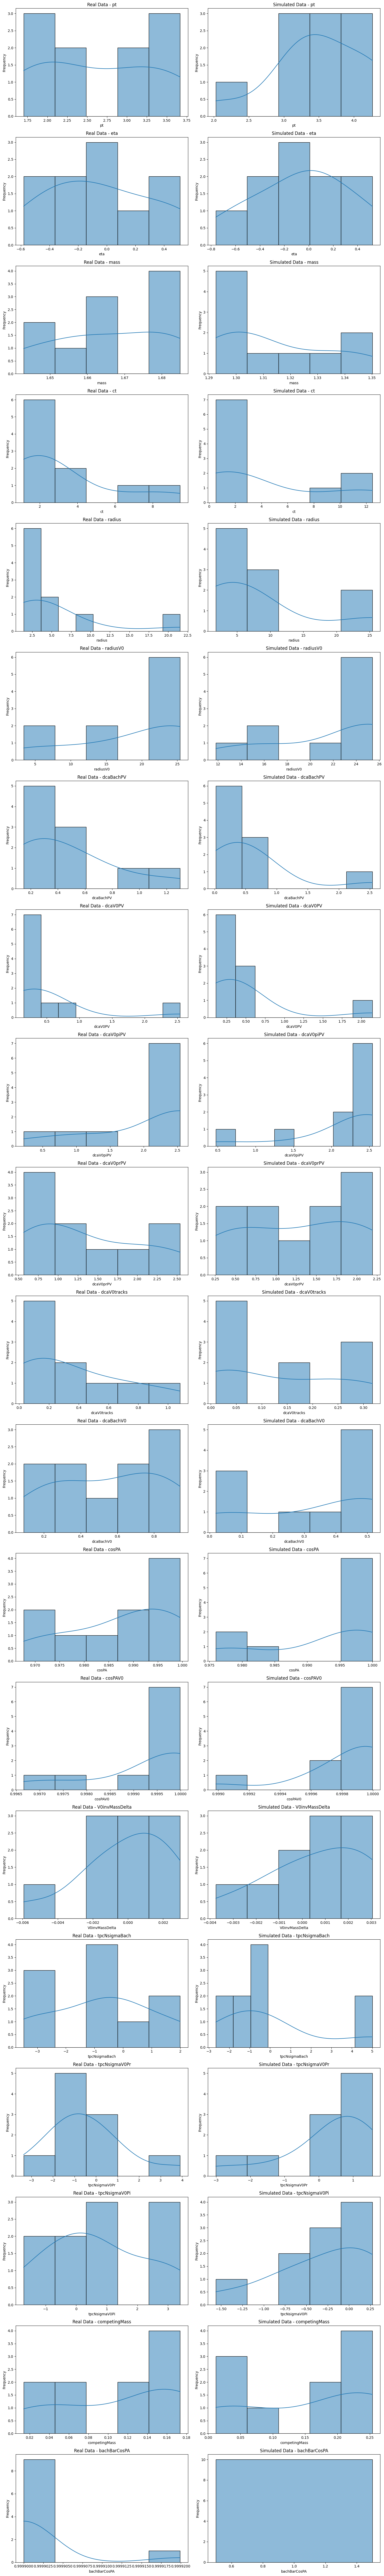

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define relevant columns for visualization
relevant_columns = ['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
                    'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
                    'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
                    'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA']

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=len(relevant_columns), ncols=2, figsize=(15, 5*len(relevant_columns)))

# Plot each column for real-world and simulated data
for i, column in enumerate(relevant_columns):
    # Bar plot for real-world data
    sns.histplot(data=AnalysisResults_reduced, x=column, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Real Data - {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Bar plot for simulated data
    sns.histplot(data=AnalysisResultsmc_reduced, x=column, ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Simulated Data - {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


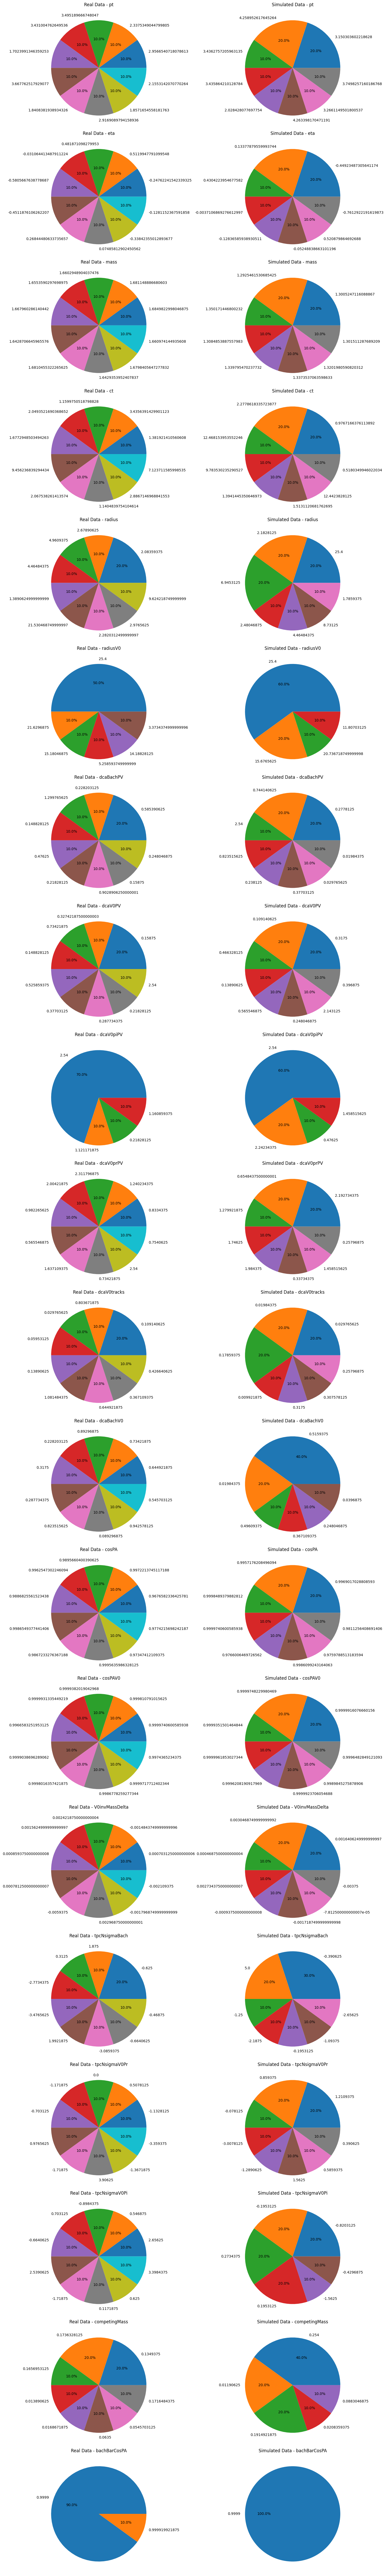

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define relevant columns for visualization
relevant_columns = ['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
                    'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
                    'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
                    'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA']

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=len(relevant_columns), ncols=2, figsize=(15, 5*len(relevant_columns)))

# Plot each column for real-world and simulated data
for i, column in enumerate(relevant_columns):
    # Pie chart for real-world data
    real_data_counts = AnalysisResults_reduced[column].value_counts()
    axes[i, 0].pie(real_data_counts, labels=real_data_counts.index, autopct='%1.1f%%')
    axes[i, 0].set_title(f'Real Data - {column}')

    # Pie chart for simulated data
    simulated_data_counts = AnalysisResultsmc_reduced[column].value_counts()
    axes[i, 1].pie(simulated_data_counts, labels=simulated_data_counts.index, autopct='%1.1f%%')
    axes[i, 1].set_title(f'Simulated Data - {column}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


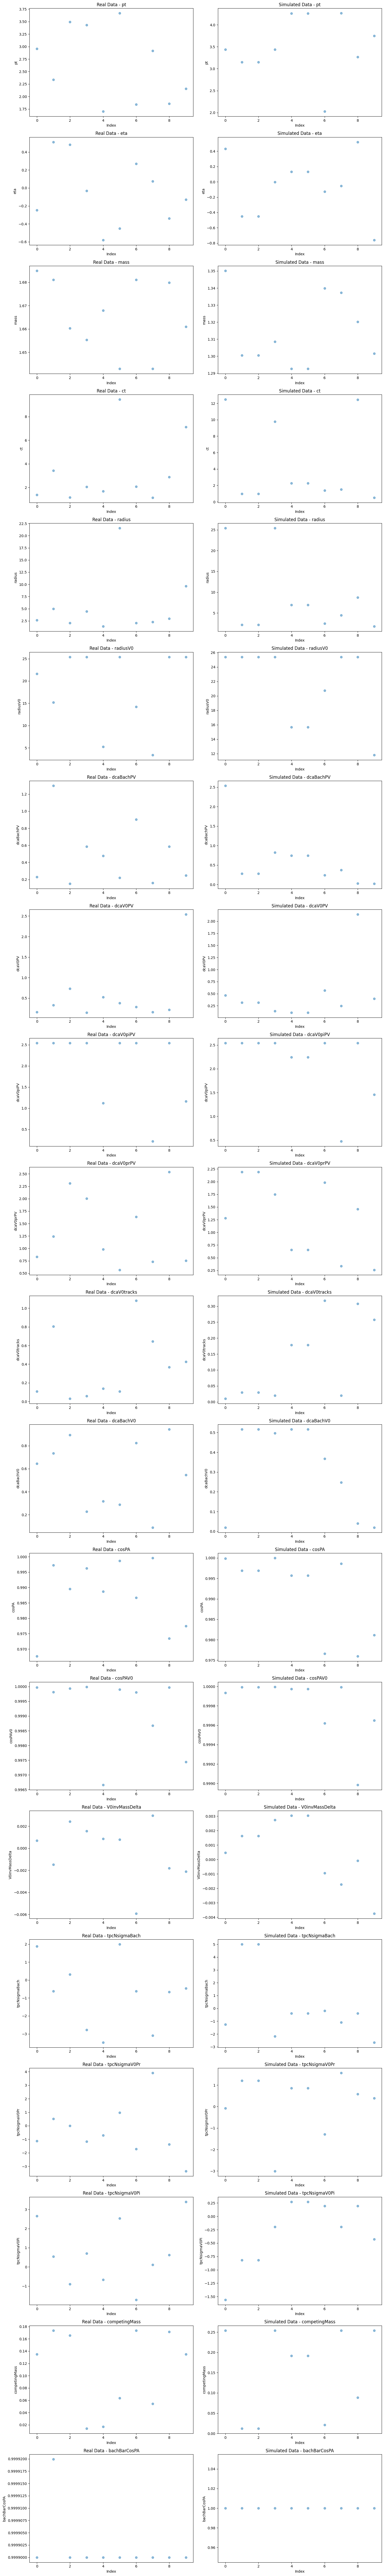

In [21]:
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=len(relevant_columns), ncols=2, figsize=(15, 5*len(relevant_columns)))

# Plot each column for real-world and simulated data
for i, column in enumerate(relevant_columns):
    # Scatter plot for real-world data
    axes[i, 0].scatter(range(len(AnalysisResults_reduced)), AnalysisResults_reduced[column], label='Real Data', alpha=0.5)
    axes[i, 0].set_title(f'Real Data - {column}')
    axes[i, 0].set_xlabel('Index')
    axes[i, 0].set_ylabel(column)

    # Scatter plot for simulated data
    axes[i, 1].scatter(range(len(AnalysisResultsmc_reduced)), AnalysisResultsmc_reduced[column], label='Simulated Data', alpha=0.5)
    axes[i, 1].set_title(f'Simulated Data - {column}')
    axes[i, 1].set_xlabel('Index')
    axes[i, 1].set_ylabel(column)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# MODELS FOR BOTH SIMULATED AND REAL WORLD DATA 


## 1. Linear Regression

Mean Squared Error (Real-world data): 0.10201711458539951
Mean Squared Error (Simulated data): 0.22879090819482414


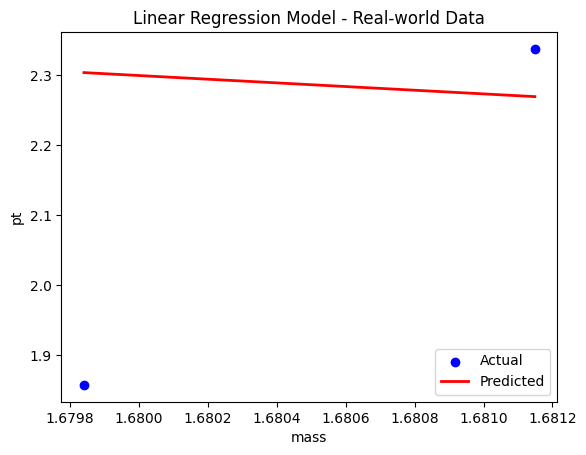

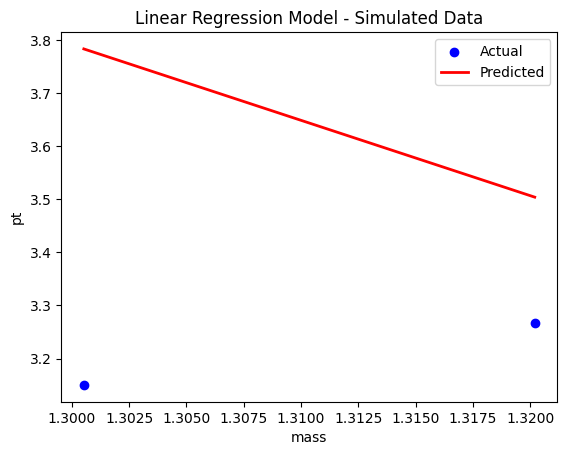

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Choose the feature and target columns
feature_column = 'mass'  # Choose any feature column from your list
target_column = 'pt'  # Choose any target column from your list

# Define the features (X) and target variable (y) for real-world data
X_real = AnalysisResults_reduced[[feature_column]]
y_real = AnalysisResults_reduced[target_column]

# Define the features (X) and target variable (y) for simulated data
X_simulated = AnalysisResultsmc_reduced[[feature_column]]
y_simulated = AnalysisResultsmc_reduced[target_column]

# Split the real-world data into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.2, random_state=42)

# Split the simulated data into training and testing sets
X_train_simulated, X_test_simulated, y_train_simulated, y_test_simulated = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model for real-world data
model_real = LinearRegression()
model_real.fit(X_train_real, y_train_real)

# Initialize and fit the linear regression model for simulated data
model_simulated = LinearRegression()
model_simulated.fit(X_train_simulated, y_train_simulated)

# Predict the target variable for real-world test data
y_pred_real = model_real.predict(X_test_real)

# Predict the target variable for simulated test data
y_pred_simulated = model_simulated.predict(X_test_simulated)

# Calculate the mean squared error for real-world data
mse_real = mean_squared_error(y_test_real, y_pred_real)

# Calculate the mean squared error for simulated data
mse_simulated = mean_squared_error(y_test_simulated, y_pred_simulated)

# Print the mean squared error for both datasets
print("Mean Squared Error (Real-world data):", mse_real)
print("Mean Squared Error (Simulated data):", mse_simulated)

# Plot the linear regression model for real-world data
plt.scatter(X_test_real, y_test_real, color='blue', label='Actual')
plt.plot(X_test_real, y_pred_real, color='red', linewidth=2, label='Predicted')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.title('Linear Regression Model - Real-world Data')
plt.legend()
plt.show()

# Plot the linear regression model for simulated data
plt.scatter(X_test_simulated, y_test_simulated, color='blue', label='Actual')
plt.plot(X_test_simulated, y_pred_simulated, color='red', linewidth=2, label='Predicted')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.title('Linear Regression Model - Simulated Data')
plt.legend()
plt.show()


1. Linear Regression
2. Logistic Regression
3. Decision Trees
4. Random Forest
5. Gradient Boosting Machines (GBM)
6. Support Vector Machines (SVM)
7. k-Nearest Neighbors (kNN)
8. Naive Bayes
9. Principal Component Analysis (PCA)
10. Partial Least Squares (PLS)
11. Gaussian Processes
12. Neural Networks (e.g., Multilayer Perceptron)
13. XGBoost
14. LightGBM
15. CatBoost
16. Lasso Regression
17. Ridge Regression
18. ElasticNet Regression
19. Decision Trees with Bagging (Bootstrap Aggregating)
20. Decision Trees with Boosting (AdaBoost)